- *Timestamps*, specific instants in time
- Fixed *periods*, such as the month January 2007 or the full year 2010
- *Intervals* of time, indicated by a start and end timestamp. Periods can be thought of as a special cases of intervals.
- *Elapsed time*, each timestamp is a measure of time relative to a particular start time.

# 11.1 Date and Time Data Types and Tools

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

now = datetime.now()
now

datetime.datetime(2021, 2, 28, 14, 24, 57, 143587)

In [4]:
now.year, now.month, now.year

(2021, 2, 2021)

- `datetime` stores both the date and time down to the microsecond
- `timedelta` represents the temporal difference between two `datetime` objects.

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 0, 15)
delta

datetime.timedelta(days=926, seconds=85500)

In [7]:
delta.days

926

In [8]:
delta.seconds

85500

You can add (or substract) a `timedelta` or multiple therof to a `datetime` object to yield a new shifted object

In [9]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

*Types in datetime module*

|Type|Description|
|---|---|
|`date`| Stores calendar date (year, month, day) using the gregorian calendar|
|`time`| Stores time of the day as hurs, minutes, seconds, and microseconds|
|`datetime`| Stores both date and time|
|`timedelta`| Represents the difference between two `datetime` values (as days, seconds, and microseconds)
|`tzinfo`| Base type for storing time zone information|

## Converting Between String and Datetime
You can convert `datetime` & `Timestamp` objects, as strings using `str` or the `strftime` method, passing a format specification.

In [11]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

*Datetime format specification*

|Type| Description|
|---|---|
|%Y| Four-digit year|
|%y| Two-digit year|
|%m| Two-digit month [01,12]|
|%d| Two-digit date [01,31]|
|%H| Hour (24-hour clock) [00,23]|
|%I| Hour (12-hour clock) [01,12]|
|%M| Two-digit Minute [00,59]|
|%S| Second [00,61] (seconds 60, 61 account for leap seconds)|
|%w| Weekday as integer [0(Sunday),6]|
|%U| Week  number the year [00,53]; Sunday is considered the first day of the week, and the days before the first Sunday of the year are "week 0"|
|%W| Week number of the year [00,53]; Monday is considered the first day of the week, and days before the first Monday of the year are "week 0"|
|%z| UTC time zone offset as +HHMM or -HHMM; empty if time zone naive|
|%F| Shortcut for %Y-%m-%d (e.g. 2012-4-18)|
|%D| Shortcut for %m/%d/%y (e.g. 04/18/12)|

In [14]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

It can be annoying to have to write a format spec each time.

In [16]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
# Dateutil is capable to parsing most human-intelligible date representation
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

`pd.to_datetime` method parses many different kinds of date representation

In [20]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [22]:
# It also handles values that should be considered missing (None, empty strings, etc.)
idx = pd.to_datetime(datestrs)
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

`datetime` objects also hve a number of locale-specific formatting options for systems in other countires and languages.

|Type| Description|
|---|---|
|%a| Abbreviated weekday name|
|%A| Full weekday name|
|%b| Abbreviated month name|
|%B| Full month name|
|%c| Full date and time (e.g. 'Tue 01 May 2012 04:20:57')|
|%p| Locale equivalent of AM or PM|
|%x| Locale-appropriate formatted date (e.g., in the United States, May 1,2012 yields '05/01/2012')|
|%X| Locale-appropriate time (e.g. '04:24:12 PM')|

# 11.2 Time Series Basics
A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or `datetime` objects:

In [40]:
from datetime import datetime
import numpy as np

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.438189
2011-01-05   -1.903683
2011-01-07   -0.191973
2011-01-08    0.848810
2011-01-10    0.910302
2011-01-12    0.538861
dtype: float64

In [41]:
# under the hood these datetime objects have been put in a DatetimeIndex
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [42]:
# ts[::2] selects every second element in ts
ts + ts[::2]

2011-01-02   -2.876378
2011-01-05         NaN
2011-01-07   -0.383947
2011-01-08         NaN
2011-01-10    1.820604
2011-01-12         NaN
dtype: float64

pandas stores timestamps using NumPy's `datetime64` data type at the nanosecond resolution:

In [43]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a`Datetimeindex` are pandas `Timestamp` objects.

In [44]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## Indexing, Selection, Subsetting
Time series behaves like any other pandas.Series

In [45]:
stamp = ts.index[2]
ts[stamp]

-0.19197327194413816

In [46]:
# you can also pass a string that is interpretable as a date:
ts['1/10/2011']

0.9103018546054957

In [47]:
ts['20110110']

0.9103018546054957

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [25]:
longer_ts = pd.Series(np.random.randn(1000),
                     index = pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.519715
2000-01-02   -1.296219
2000-01-03   -1.409047
2000-01-04   -0.925559
2000-01-05    1.806174
                ...   
2002-09-22    1.220803
2002-09-23    0.010882
2002-09-24   -0.963291
2002-09-25   -0.109195
2002-09-26   -0.180821
Freq: D, Length: 1000, dtype: float64

In [26]:
longer_ts['2001']

2001-01-01   -1.859523
2001-01-02   -0.402467
2001-01-03   -1.476846
2001-01-04    1.559275
2001-01-05   -0.474411
                ...   
2001-12-27    1.010153
2001-12-28   -0.704613
2001-12-29    0.579937
2001-12-30   -0.035439
2001-12-31    3.243391
Freq: D, Length: 365, dtype: float64

In [27]:
# This also works if you specify the month
longer_ts['2001-05']

2001-05-01   -1.210577
2001-05-02    1.271874
2001-05-03   -0.189333
2001-05-04    0.784715
2001-05-05    0.245341
2001-05-06   -1.424276
2001-05-07   -1.316137
2001-05-08    0.640042
2001-05-09   -1.202451
2001-05-10   -0.376908
2001-05-11   -0.260976
2001-05-12   -1.092357
2001-05-13    1.170688
2001-05-14    1.454181
2001-05-15   -0.923882
2001-05-16    0.797084
2001-05-17   -0.130959
2001-05-18   -0.348218
2001-05-19   -1.724741
2001-05-20    2.489259
2001-05-21    1.054894
2001-05-22   -0.433493
2001-05-23   -0.314081
2001-05-24    0.780065
2001-05-25   -1.225406
2001-05-26    0.896281
2001-05-27    1.757438
2001-05-28   -0.910776
2001-05-29    1.209563
2001-05-30   -0.280859
2001-05-31    0.090577
Freq: D, dtype: float64

In [48]:
# Slicing with datetime objects
ts[datetime(2011, 1, 7):]

2011-01-07   -0.191973
2011-01-08    0.848810
2011-01-10    0.910302
2011-01-12    0.538861
dtype: float64

In [49]:
ts

2011-01-02   -1.438189
2011-01-05   -1.903683
2011-01-07   -0.191973
2011-01-08    0.848810
2011-01-10    0.910302
2011-01-12    0.538861
dtype: float64

Because most time series data is ordered chronologically, you can slice with time-stamps not contained in a time series to perform a range query.

Slicing like this manner produces views on the source time series like slicing NumPy array.

In [37]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.257006
2011-01-08    1.950434
2011-01-10   -0.466973
dtype: float64

`truncate`: slices a Series between two dates

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.438189
2011-01-05   -1.903683
2011-01-07   -0.191973
2011-01-08    0.848810
dtype: float64

In [58]:
# All this holds true for DataFrame as well, indexing on its rows:
dates = pd.date_range('1/1/2021', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2021']

,Colorado,Texas,New York,Ohio
2021-05-05,-1.212994,-1.127714,0.745734,1.219611
2021-05-12,-0.700037,0.811298,0.372074,0.270362
2021-05-19,-0.559447,-0.634633,1.150859,0.169059
2021-05-26,-0.978480,-0.146860,-0.785143,-0.228172


In [59]:
long_df

,Colorado,Texas,New York,Ohio
2021-01-06,0.341600,-2.224427,0.687374,-0.764371
2021-01-13,-1.035060,-0.711554,-0.406731,-0.607457
2021-01-20,-1.307085,0.832984,-0.027273,-2.294335
2021-01-27,1.278445,0.777430,1.957823,-1.901693
2021-02-03,-0.619840,-0.286570,0.419182,0.263525
...,...,...,...,...
2022-11-02,0.231548,1.642850,1.268540,0.170536
2022-11-09,-0.594680,-0.823119,0.177460,-0.849807
2022-11-16,0.400793,1.269071,-0.485428,1.305062
2022-11-23,1.237590,-0.193239,-0.592684,-1.493020


## Time Series with Duplicate Indices
In some applications, there may be multiple data observation falling on a particular timestamp.

In [70]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [61]:
# We can tell the index is not unique by checking it
dup_ts.index.is_unique

False

In [66]:
dup_ts['1/3/2000'] # Not Duplicated

4

In [71]:
dup_ts['1/2/2000'] # Duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [74]:
# Suppose you wanted to aggregate the data having the non-unique timestamps
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

In [75]:
ts

2011-01-02   -1.438189
2011-01-05   -1.903683
2011-01-07   -0.191973
2011-01-08    0.848810
2011-01-10    0.910302
2011-01-12    0.538861
dtype: float64

`resample`: convert the sample time series to be fixed daily frequency.

In [77]:
# String 'D' is interpreted as daily frequency
resampler = ts.resample('D')

## Generating Date Ranges
`pandas.date_range` is responsible for generating a `DatetimeIndex` with an indicated length according to a particular frequency.

In [78]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, `date_range` generates daily timestamps. If you pass only a start or end date, you must pass a number of periods to generate.

In [81]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define a strict boundaries for the generated date index.

In [84]:
# Only dates falling on or inside the date interval will be included. 
# Here we are counting the last business day of each month.
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [93]:
pd.date_range('2021-01-01', '2021-12-31', freq='Q-JAN')

DatetimeIndex(['2021-01-31', '2021-04-30', '2021-07-31', '2021-10-31'], dtype='datetime64[ns]', freq='Q-JAN')

In [92]:
pd.date_range('2021-01-01', '2021-12-31', freq='QS-JAN')

DatetimeIndex(['2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

In [94]:
pd.date_range('2021-01-01', '2021-12-31', freq='A-JAN')

DatetimeIndex(['2021-01-31'], dtype='datetime64[ns]', freq='A-JAN')

In [98]:
pd.date_range('2021-01-01', '2021-12-31', freq='BA-JAN')

DatetimeIndex(['2021-01-29'], dtype='datetime64[ns]', freq='BA-JAN')

In [117]:
# Friday of each week
pd.date_range('2021-01-01', '2021-12-31', freq='W-FRI')

DatetimeIndex(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
               '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19',
               '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19',
               '2021-03-26', '2021-04-02', '2021-04-09', '2021-04-16',
               '2021-04-23', '2021-04-30', '2021-05-07', '2021-05-14',
               '2021-05-21', '2021-05-28', '2021-06-04', '2021-06-11',
               '2021-06-18', '2021-06-25', '2021-07-02', '2021-07-09',
               '2021-07-16', '2021-07-23', '2021-07-30', '2021-08-06',
               '2021-08-13', '2021-08-20', '2021-08-27', '2021-09-03',
               '2021-09-10', '2021-09-17', '2021-09-24', '2021-10-01',
               '2021-10-08', '2021-10-15', '2021-10-22', '2021-10-29',
               '2021-11-05', '2021-11-12', '2021-11-19', '2021-11-26',
               '2021-12-03', '2021-12-10', '2021-12-17', '2021-12-24',
               '2021-12-31'],
              dtype='datetime64[ns]', freq='W-F

`date_range` by default preserves the time (if any) of the start or end timestamp.

In [100]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [102]:
# You can normalize to midnight as convention
pd.date_range('2012-05-02', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets
<mark>Frequencies in pandas are composed of a *base frequency* and a multiplier.</mark> Base Frequencies are typically referred to by a string alias, like '`M`' for monthly or '`H`' for hourly. <mark>For each base frequency, there is an object defined, generally referred to as *date offset*.</mark>

For example, hourly frequency can be reprented with the `Hour` class.

In [105]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [107]:
# You can define a multiple of an offset by passing an integer
four_hours = Hour(4)
four_hours

<4 * Hours>

In most application, you would never need to explicitly create one of these objects instead using a string alias like '`H`' or '`4H`'.

In [108]:
pd.date_range('2000-01-01', '2000-01-03', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [109]:
# Many offsets can be combined together by addition
Hour(2) + Minute(30)

<150 * Minutes>

In [110]:
pd.date_range('2000-01-01', periods=10, freq='1H30MIN')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

*Anchored* offsets frequencies describe points in time that are not evenly spaced.

### Week of month dates
Generate weekly dates in the first, second, third, or fourth week of the month (e.g., WOM-3FRI for the third Friday of each month)

In [113]:
# 3rd week of each month; Friday
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## Shifting (Leading and Lagging) Data
"Shifting" refers to moving data backward and forward through time.

Both Series and DataFrame have a `shift` method for doing naive shifts forwards or backwards, leaving the index unmodified.

In [128]:
ts = pd.Series(np.random.rand(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.213445
2000-02-29    0.391370
2000-03-31    0.693432
2000-04-30    0.323398
Freq: M, dtype: float64

In [120]:
# Moving data forward in time by 2
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.725219
2000-04-30    0.927340
Freq: M, dtype: float64

In [121]:
# Moving data backward in time by 2
ts.shift(-2)

2000-01-31    0.256871
2000-02-29    0.464883
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A common use of `shift` is computing percent changes in a time series or multiple time series as DataFrame columns. Expressed as:

In [129]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    0.833587
2000-03-31    0.771807
2000-04-30   -0.533627
Freq: M, dtype: float64

If the frequency is known, it can passed to `shift` to advance the timestamps instead of simply discarding the data.

In [130]:
ts.shift(2, freq='M')

2000-03-31    0.213445
2000-04-30    0.391370
2000-05-31    0.693432
2000-06-30    0.323398
Freq: M, dtype: float64

In [131]:
# days shifted by 2
ts.shift(2, freq='D')

2000-02-02    0.213445
2000-03-02    0.391370
2000-04-02    0.693432
2000-05-02    0.323398
dtype: float64

In [132]:
# Here T standes for minutes
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.213445
2000-02-29 01:30:00    0.391370
2000-03-31 01:30:00    0.693432
2000-04-30 01:30:00    0.323398
dtype: float64

### Shifting dates with offsets
Pandas date offsets can also be used with `datetime` or `Timestamp` objects.

In [133]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

#### If you add an anchored offset like `MonthEnd`, the first increment will "roll forward" a date to the next date according to the frequency rule:

In [134]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [135]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly "roll" dates forward or backward by simply using their `rollforward` and `rollback` mathods, respectively:

In [137]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [138]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [141]:
# A creative use of date offsets is to use these methods with groupby
ts = pd.Series(np.arange(20), 
               index=pd.date_range('1/15/2000', periods=20, freq='4D'))
ts

2000-01-15     0
2000-01-19     1
2000-01-23     2
2000-01-27     3
2000-01-31     4
2000-02-04     5
2000-02-08     6
2000-02-12     7
2000-02-16     8
2000-02-20     9
2000-02-24    10
2000-02-28    11
2000-03-03    12
2000-03-07    13
2000-03-11    14
2000-03-15    15
2000-03-19    16
2000-03-23    17
2000-03-27    18
2000-03-31    19
Freq: 4D, dtype: int32

In [144]:
ts.groupby(offset.rollforward).mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
dtype: float64

Of course, an easier and faster way to do s using `resample`

In [145]:
ts.resample('M').mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
Freq: M, dtype: float64

# 11.4 Time Zone Handling
In Python, time zone information comes from the third-party `pytz` library, which exposes the *Olson Database*.|

In [2]:
import pytz
import numpy as np

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [156]:
# Starting from 5th index from last up until the sequence
np.arange(20)[-5:]

array([15, 16, 17, 18, 19])

In [154]:
# Ending on the 5th index from last; starting from beginning of the sequence
np.arange(20)[:-5]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [155]:
# Up until index 5
np.arange(20)[:5]

array([0, 1, 2, 3, 4])

In [3]:
# Reverse the order
np.arange(20)[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

In [4]:
# Start selecting from last element until end
np.arange(20)[-1::]

array([19])

In [5]:
# Starting from last one select every 2nd element from last 
np.arange(20)[::-2]

array([19, 17, 15, 13, 11,  9,  7,  5,  3,  1])

In [158]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will accept either time zone names OR these objects.

## Time Zone Localization and Conversion
By default, time series in pandas are *time zone naives*.

In [160]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), 
               index=rng)

ts

2012-03-09 09:30:00    1.692642
2012-03-10 09:30:00    0.760442
2012-03-11 09:30:00    0.104750
2012-03-12 09:30:00   -0.047355
2012-03-13 09:30:00    1.121059
2012-03-14 09:30:00    0.568254
Freq: D, dtype: float64

In [169]:
# The index's tz field is None...
print(ts.index.tz)

None


Date ranges can be generated with a time zone set like this:

In [163]:
pd.date_range('3/9/2021 10:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2021-03-09 10:30:00+00:00', '2021-03-10 10:30:00+00:00',
               '2021-03-11 10:30:00+00:00', '2021-03-12 10:30:00+00:00',
               '2021-03-13 10:30:00+00:00', '2021-03-14 10:30:00+00:00',
               '2021-03-15 10:30:00+00:00', '2021-03-16 10:30:00+00:00',
               '2021-03-17 10:30:00+00:00', '2021-03-18 10:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

#### `tz_localize`
Conversion from naive to *localized* time series.

In [164]:
ts

2012-03-09 09:30:00    1.692642
2012-03-10 09:30:00    0.760442
2012-03-11 09:30:00    0.104750
2012-03-12 09:30:00   -0.047355
2012-03-13 09:30:00    1.121059
2012-03-14 09:30:00    0.568254
Freq: D, dtype: float64

In [167]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    1.692642
2012-03-10 09:30:00+00:00    0.760442
2012-03-11 09:30:00+00:00    0.104750
2012-03-12 09:30:00+00:00   -0.047355
2012-03-13 09:30:00+00:00    1.121059
2012-03-14 09:30:00+00:00    0.568254
Freq: D, dtype: float64

In [168]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

#### `tz_convert`
Once a time series has been localized to a particular time zone, it can be converted to another time zone.

In [174]:
ts_utc.tz_convert('Asia/Kolkata')

2012-03-09 15:00:00+05:30    1.692642
2012-03-10 15:00:00+05:30    0.760442
2012-03-11 15:00:00+05:30    0.104750
2012-03-12 15:00:00+05:30   -0.047355
2012-03-13 15:00:00+05:30    1.121059
2012-03-14 15:00:00+05:30    0.568254
Freq: D, dtype: float64

In the case of the preceding time series, which standdles a DST transition in the `America/New_York` time zone, we could localize to EST and convert to, say, UTC or Berlin time:

What is the different in localizing and converting time zones?

In [183]:
ts_utc_convert = ts_utc.tz_convert('America/New_York')
ts_utc_convert

2012-03-09 04:30:00-05:00    1.692642
2012-03-10 04:30:00-05:00    0.760442
2012-03-11 05:30:00-04:00    0.104750
2012-03-12 05:30:00-04:00   -0.047355
2012-03-13 05:30:00-04:00    1.121059
2012-03-14 05:30:00-04:00    0.568254
Freq: D, dtype: float64

In [177]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00    1.692642
2012-03-10 09:30:00-05:00    0.760442
2012-03-11 09:30:00-04:00    0.104750
2012-03-12 09:30:00-04:00   -0.047355
2012-03-13 09:30:00-04:00    1.121059
2012-03-14 09:30:00-04:00    0.568254
dtype: float64

In [180]:
ts 

2012-03-09 09:30:00    1.692642
2012-03-10 09:30:00    0.760442
2012-03-11 09:30:00    0.104750
2012-03-12 09:30:00   -0.047355
2012-03-13 09:30:00    1.121059
2012-03-14 09:30:00    0.568254
Freq: D, dtype: float64

In [182]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.692642
2012-03-10 15:30:00+01:00    0.760442
2012-03-11 14:30:00+01:00    0.104750
2012-03-12 14:30:00+01:00   -0.047355
2012-03-13 14:30:00+01:00    1.121059
2012-03-14 14:30:00+01:00    0.568254
dtype: float64

In [186]:
ts_utc_convert.tz_convert('Europe/Berlin')

[1.6926415278507358,
 0.76044172178408,
 0.10474984433334569,
 -0.04735525920181803,
 1.1210593742837116,
 0.5682539387940321]

`tz_localize` and `tz_convert` are also instance methods on `DatetimeIndex`.

In [185]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

## Operations with Time Zone-Aware Timestamp Objects
We can also convert individual `Timestamp` objects from one time to another.

In [187]:
stamp = pd.Timestamp('2021-03-12 4:00')

stamp_utc = stamp.tz_localize('UTC')
stamp_utc.tz_convert('Asia/Kolkata')

Timestamp('2021-03-12 09:30:00+0530', tz='Asia/Kolkata')

You can also pass Time Zone when creating `Timestamp`

In [190]:
stamp_moscoq = pd.Timestamp('2021-03-12 4:00', tz='Europe/Moscow')
stamp_moscoq

Timestamp('2021-03-12 04:00:00+0300', tz='Europe/Moscow')

<mark>Time zone-aware `Timestamp` objects internally store a UTC timestamp value as nanoseconds since the Unix epoch (January 1, 1970);</mark> this UTC value is invariant between time zone conversions:

In [191]:
stamp_utc.value

1615521600000000000

In [193]:
stamp_utc.tz_convert('Asia/Kolkata').value

1615521600000000000

#### When performing time arithmetic using pandas's `DateOffset` objects, pandas respects daylight saving time transitions where possible.
Here we construct time-stamps that occur <mark>right before DST transition</mark> (forward and backward).

**First, 30 minutes before transitioning to DST**.

In [200]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [201]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

**Then, 90 minutes before transitioning out of DST**

In [198]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [199]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operations Between Different Time Zones
If two time series with different time zones are combined, the result will be UTC.

In [202]:
rng = pd.date_range('3/7/2021 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2021-03-08 09:30:00   -0.449730
2021-03-09 09:30:00    1.862776
2021-03-10 09:30:00   -0.777194
2021-03-11 09:30:00    0.202471
2021-03-12 09:30:00   -1.745317
2021-03-15 09:30:00   -0.313003
2021-03-16 09:30:00   -0.877518
2021-03-17 09:30:00    0.719533
2021-03-18 09:30:00    1.811058
2021-03-19 09:30:00    0.477195
Freq: B, dtype: float64

In [204]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

In [205]:
result.index

DatetimeIndex(['2021-03-08 09:30:00+00:00', '2021-03-09 09:30:00+00:00',
               '2021-03-10 09:30:00+00:00', '2021-03-11 09:30:00+00:00',
               '2021-03-12 09:30:00+00:00', '2021-03-15 09:30:00+00:00',
               '2021-03-16 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 Periods and Period Arithmetic
`pandas.Period`

*Periods* represents timespans, like days or months.

#### <mark>In this case</mark>, the `Period` object represents the full timespane from Januray 1, 2021 to December 31, 2021, inclusive

In [207]:
p = pd.Period(2021, freq='A-DEC')
p

Period('2021', 'A-DEC')

In [208]:
# Adding or substracting integers from periods has the effect of shifting by their frequency
p + 5

Period('2026', 'A-DEC')

In [209]:
p - 2

Period('2019', 'A-DEC')

In [210]:
# If two periods have the same frequency, their difference is the number of units between them
pd.Period('2030', freq='A-DEC') - p

<9 * YearEnds: month=12>

`pandas_period_range`: Create ranges of periods.

In [213]:
rng = pd.period_range('1999-12-31', '2000-06-15', freq='M')
rng

PeriodIndex(['1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05',
             '2000-06'],
            dtype='period[M]', freq='M')

`PeriodIndex`: stores a sequence of periods and can serve as an axis index.

In [215]:
pd.Series(np.random.randn(7), index=rng)

1999-12   -0.047910
2000-01    0.428949
2000-02   -0.672679
2000-03   -0.710250
2000-04    0.065242
2000-05    0.196036
2000-06    0.644529
Freq: M, dtype: float64

In [216]:
# You can also create a PeriodIndex if you have an array.
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period Frequency Conversion
`asfreq`: Periods and `PeriodIndex` objects can be converted to another frequency.

In [217]:
# Converting annual period to Monthly period
# either at the start OR at the end of the year
p = pd.Period('2020', freq='A-DEC')
p

Period('2020', 'A-DEC')

In [218]:
p.asfreq('M', how='start')

Period('2020-01', 'M')

In [219]:
p.asfreq('M', how='end')

Period('2020-12', 'M')

For a <mark>*fiscal year*</mark> ending on a month other than December, the corresponding subperiods are different:

In [220]:
# JUN (6)
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [221]:
# The actual period might have started from
# End of June(6)(A-JUN) of 2006; So start -> 2006-07
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [222]:
# So, now since the period ends in this year (2007) on last date of June(6)
# end -> 2007-06
p.asfreq('M', 'end')

Period('2007-06', 'M')

When you are converting from high to low frequency, pandas determines the superperiod dependng on where the subperiod "belongs".

In [225]:
p = pd.Period('AUG-2007', 'M')

# In A-JUN, year ends in June
# So, Aug-2007 is actually part of the 2008 period
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [227]:
# Whole PeriodIndex objects or time series can be similarly converted with the same semantics
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index = rng)

ts

2006    0.464914
2007    1.598483
2008   -1.142274
2009   -0.780634
Freq: A-DEC, dtype: float64

In [230]:
ts.asfreq('M', how='start')

2006-01    0.464914
2007-01    1.598483
2008-01   -1.142274
2009-01   -0.780634
Freq: M, dtype: float64

In [231]:
# If we wanted the last business day of each year.
ts.asfreq('B', how='end')

2006-12-29    0.464914
2007-12-31    1.598483
2008-12-31   -1.142274
2009-12-31   -0.780634
Freq: B, dtype: float64

## Quarterly Period Frequencies

In [239]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [235]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [234]:
p.asfreq('D', how='end')

Period('2012-01-31', 'D')

In [240]:
# To get the timestamp at 4 PM on the second-to-last business day of the quarter
#  Here 'e' ans 's' are aliased for 'end' and 'start'
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [241]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [244]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [245]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 *60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## Converting Timestamps to Periods (and Back)
`to_period`: Series and DataFrame objects indexed by timestamps can be converted to periods.

In [247]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.282535
2000-02-29   -0.470132
2000-03-31   -0.547299
Freq: M, dtype: float64

In [250]:
pts = ts.to_period()
pts

2000-01    0.282535
2000-02   -0.470132
2000-03   -0.547299
Freq: M, dtype: float64

You can also specify any frequency you want, when converting to periods. There is also no problem with having duplicate periods in the result.

In [251]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.361363
2000-01-30   -0.451199
2000-01-31    0.721807
2000-02-01    0.021054
2000-02-02   -0.567049
2000-02-03    0.733828
Freq: D, dtype: float64

In [252]:
ts2.to_period('M')

2000-01    1.361363
2000-01   -0.451199
2000-01    0.721807
2000-02    0.021054
2000-02   -0.567049
2000-02    0.733828
Freq: M, dtype: float64

`to_timestamp`: to convert back to timestamps.

In [253]:
pts = ts2.to_period()
pts

2000-01-29    1.361363
2000-01-30   -0.451199
2000-01-31    0.721807
2000-02-01    0.021054
2000-02-02   -0.567049
2000-02-03    0.733828
Freq: D, dtype: float64

In [254]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.361363
2000-01-30 23:59:59.999999999   -0.451199
2000-01-31 23:59:59.999999999    0.721807
2000-02-01 23:59:59.999999999    0.021054
2000-02-02 23:59:59.999999999   -0.567049
2000-02-03 23:59:59.999999999    0.733828
Freq: D, dtype: float64

## Creating a PeriodIndex from Arrays
Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns. For example, in this macroeconomic dataset, the year and quarter are in different columns:

In [257]:
data = pd.read_csv('datasets/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [260]:
# By passing these columns to PeriodIndex, you can create periods
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [262]:
data.index = index
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# 11.6 Resampling and Frequency Conversion
`resample`

<mark>*Resampling* refers to the process of converting a time series from one frequency to another.</mark> `resample` has a similar API to `groupby`, you call `resample` to group the data, then call an aggregation function.

||||
|---|---|---|
|Aggregating higher frequency data $\rightarrow$ Lower Frequency | **Downsampling**| **Aggregation required**|
|Aggregating Lower Frequency data $\rightarrow$ Higher Frequency | **Upsampling**| **No Aggregation required**|   

In [264]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.532128
2000-01-02    1.043245
2000-01-03   -0.541052
2000-01-04   -1.971162
2000-01-05    0.419778
                ...   
2000-04-05    0.316905
2000-04-06   -0.088422
2000-04-07   -2.137557
2000-04-08   -0.556198
2000-04-09   -0.025775
Freq: D, Length: 100, dtype: float64

In [267]:
# Downsampling in this case
ts.resample('M').mean()

2000-01-31   -0.081778
2000-02-29    0.086833
2000-03-31    0.107924
2000-04-30   -0.260962
Freq: M, dtype: float64

In [269]:
ts.resample('M', kind='period').mean()

2000-01   -0.081778
2000-02    0.086833
2000-03    0.107924
2000-04   -0.260962
Freq: M, dtype: float64

*Table 11-5. Resample method arguments*

|Argument|Description|
|---|---|
|**`freq`**| String or Dateoffset indicating resampled desired frequency (e.g. 'M', '5min', or Second(15))|
|**`axis`**| Axis to resample on; default axis=0|
|**`fill_method`**| How to interpolate when <mark>upsampling</mark>, as in '`ffill`' or '`bfill`'; by default does no interpolation|
|**`closed`**| In <mark>downsampling</mark>, which end of each interval is closed (inclusive), '`right`' or '`left`'|
|**`label`**| In <mark>downsampling</mark>, how to label the aggregated data, with the '`right`' or '`left`' bin edge (e.g. te 9:30 to 9:35 five minute interval could be labeled 9:30 or 9:35)|
|**`loffset`**| Time adjustment to the bin labels, such as '-1s'/ Second(-1) to shift the aggregate the labels one second earlier|
|**`limit`**| When forward or backward filling, the maximum number of periods to fill|
|**`kind`**| Aggregate to periods ('`period`') or timestamps ('`timestamps`'); default to the type of index the time series has|
|**`convention`**| When resampling periods, the convention ('`start`' or '`end`') for converting the low frequency period to high frequency; default to '`end`'|

## Downsampling
- The desired frequency defines <mark>*bin edges*</mark> that are used to slice the time series into pieces to aggregate.
- Each interval is said to be <mark>*half open*</mark>; a data point can only belong to one interval, and the union of the intervals make up the whole original time frame. 

There are couple of things to think about when using `resample` to downsample data:

- **Which side of each interval is <mark>closed</mark>**
- **How to label each aggregated bin, either with the start of the interval or the end**

In [270]:
# Let's look at some one-minute data
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [274]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [298]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [304]:
from pandas.tseries.frequencies import to_offset

# Can also use shift method
resampled = ts.resample('5T', closed='right', label='right').sum() 
resampled.index = resampled.index + to_offset("-1s")
resampled

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [308]:
rs = ts.resample('5T', closed='right', label='right').sum()
rs.shift(-1)

2000-01-01 00:00:00    15.0
2000-01-01 00:05:00    40.0
2000-01-01 00:10:00    11.0
2000-01-01 00:15:00     NaN
Freq: 5T, dtype: float64

### Open-High-Low-Close (OHLC) resampling
`ohlc`

In finance, a popular way to aggregate a time series is to compute four values for each bucket: the <mark>first (open)</mark>, <mark>last (close)</mark>, <mark>maximum (high)</mark>, and <mark>minimal (low) values</mark>. 

In [309]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Upsampling and Interpolation
When converting from lower frequency to higher frequency, no aggregation is required.

In [319]:
frame = pd.DataFrame(np.random.randn(2,4),
                     index=pd.date_range('1/1/2021', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2021-01-06,-0.402849,-1.061165,-1.593685,0.707517
2021-01-13,0.687202,-0.219244,-0.269088,-0.475703


In [320]:
# use asfreq to convert to the higher frequency without any aggregation
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2021-01-06,-0.402849,-1.061165,-1.593685,0.707517
2021-01-07,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN,NaN
2021-01-09,NaN,NaN,NaN,NaN
2021-01-10,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN
2021-01-12,NaN,NaN,NaN,NaN
2021-01-13,0.687202,-0.219244,-0.269088,-0.475703


Suppose you wanted to fill forward each weekly value on the non-Wednesdays

In [321]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2021-01-06,-0.402849,-1.061165,-1.593685,0.707517
2021-01-07,-0.402849,-1.061165,-1.593685,0.707517
2021-01-08,-0.402849,-1.061165,-1.593685,0.707517
2021-01-09,-0.402849,-1.061165,-1.593685,0.707517
2021-01-10,-0.402849,-1.061165,-1.593685,0.707517
2021-01-11,-0.402849,-1.061165,-1.593685,0.707517
2021-01-12,-0.402849,-1.061165,-1.593685,0.707517
2021-01-13,0.687202,-0.219244,-0.269088,-0.475703


In [322]:
# You can certainly limit to only fill a certain number of periods forward 
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2021-01-06,-0.402849,-1.061165,-1.593685,0.707517
2021-01-07,-0.402849,-1.061165,-1.593685,0.707517
2021-01-08,-0.402849,-1.061165,-1.593685,0.707517
2021-01-09,NaN,NaN,NaN,NaN
2021-01-10,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN
2021-01-12,NaN,NaN,NaN,NaN
2021-01-13,0.687202,-0.219244,-0.269088,-0.475703


In [328]:
# Notably, the new date index need not overlap with the old one at all
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2021-01-07,-0.402849,-1.061165,-1.593685,0.707517
2021-01-14,0.687202,-0.219244,-0.269088,-0.475703


## Resampling with Periods
Resampling data indexed by periods is similar to timestamps

In [329]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2021', '12-2022', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2021-01,-0.064749,-1.094983,-2.444107,-1.505337
2021-02,-0.933834,0.233041,-0.643264,-0.738896
2021-03,1.392536,0.958497,1.665547,-0.733906
2021-04,1.764677,-1.232222,0.664264,0.558652
2021-05,2.553504,-0.248957,-1.600895,-0.853588


In [333]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2021,0.261208,-0.110297,-0.252479,-0.175973
2022,-0.530742,-0.178374,-0.072123,0.689714


#### Upsampling is more nuanced, as you must make a decision about which end of the timespan in the new frequency to place the values before resampling.

In [336]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2021Q1,0.261208,-0.110297,-0.252479,-0.175973
2021Q2,0.261208,-0.110297,-0.252479,-0.175973
2021Q3,0.261208,-0.110297,-0.252479,-0.175973
2021Q4,0.261208,-0.110297,-0.252479,-0.175973
2022Q1,-0.530742,-0.178374,-0.072123,0.689714
2022Q2,-0.530742,-0.178374,-0.072123,0.689714
2022Q3,-0.530742,-0.178374,-0.072123,0.689714
2022Q4,-0.530742,-0.178374,-0.072123,0.689714


In [338]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2021Q4,0.261208,-0.110297,-0.252479,-0.175973
2022Q1,0.261208,-0.110297,-0.252479,-0.175973
2022Q2,0.261208,-0.110297,-0.252479,-0.175973
2022Q3,0.261208,-0.110297,-0.252479,-0.175973
2022Q4,-0.530742,-0.178374,-0.072123,0.689714


Rules about downsampling and upsampling:
- **In downsampling, the target frequency must be a *subperiod* of the source frequency.**
- **In upsampling, the target frequency must be a *superperiod* of the source frequency.**

If these rules are not satisfied, an exception will be raised. For, example, the timespans defined by `Q-MAR` only line up with `A-MAR`, `A-JUN`, `A-SEP`, and `A-DEC`.

In [346]:
annual_frame.resample('Q-APR', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2021Q3,0.261208,-0.110297,-0.252479,-0.175973
2021Q4,0.261208,-0.110297,-0.252479,-0.175973
2022Q1,0.261208,-0.110297,-0.252479,-0.175973
2022Q2,0.261208,-0.110297,-0.252479,-0.175973
2022Q3,-0.530742,-0.178374,-0.072123,0.689714
2022Q4,-0.530742,-0.178374,-0.072123,0.689714
2023Q1,-0.530742,-0.178374,-0.072123,0.689714
2023Q2,-0.530742,-0.178374,-0.072123,0.689714
2023Q3,-0.530742,-0.178374,-0.072123,0.689714


# 11.7 Moving Window Functions
An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights.

In [2]:
close_px_all = pd.read_csv('datasets/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

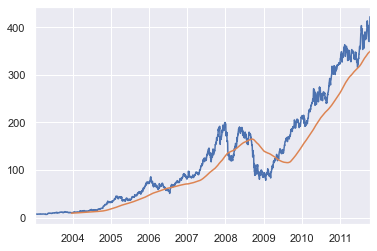

In [5]:
import seaborn as sbs
sbs.set_theme()

# Here we have the 250-day moving window average of Apple's Stock price
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()